In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
data_bangalore=pd.read_csv("bangalore_cars.csv",  encoding="latin-1")

In [3]:
data_bangalore

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [4]:
Fuel_type=[]
Kilometers_driven=[]
Transmission_type=[]
No_of_owners=[]
Original_Equipment_Manufacturer=[]
model=[]
model_year=[]
price=[]
registration_year=[]
seats=[]
engine_cc=[]
Mileage=[]

for i in range(data_bangalore.shape[0]):
    new_car_detail=data_bangalore["new_car_detail"][i]
    new_car_overview=data_bangalore["new_car_overview"][i]
    new_car_specs=data_bangalore["new_car_specs"][i]

    data_dict=ast.literal_eval(new_car_detail)
    data_dict_1=ast.literal_eval(new_car_overview)
    data_dict_2=ast.literal_eval(new_car_specs)

    Fuel_type.append(data_dict["ft"])
    Kilometers_driven.append(data_dict["km"])
    Transmission_type.append(data_dict["transmission"])
    No_of_owners.append(data_dict["ownerNo"])
    Original_Equipment_Manufacturer.append(data_dict["oem"])
    model.append(data_dict["model"])
    model_year.append(int(data_dict["modelYear"]))
    price.append(float(data_dict["price"][2:-5])*100000)
    registration_year.append(data_dict_1["top"][0]["value"][-4])
    seats.append(data_dict_1["top"][3]["value"][0])

    try:
        if (data_dict_2["data"][0]["list"][2]["value"]).isnumeric():
            engine_cc.append(data_dict_2["data"][0]["list"][2]["value"])
        else:
            engine_cc.append(data_dict_2["data"][0]["list"][1]["value"])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2["top"][0]["value"][:-5])

data_bangalore["Fuel_Type"]= Fuel_type
data_bangalore["Kilometers_Driven"]= Kilometers_driven
data_bangalore["Transmission_Type"]= Transmission_type
data_bangalore["No_of_Owners"]= No_of_owners
data_bangalore["Manufactured_By"]= Original_Equipment_Manufacturer
data_bangalore["Car_Model"]= model
data_bangalore["Car_Produced_Year"]= model_year
data_bangalore["Car_Price"]= price
data_bangalore["Registration_Year"]= registration_year
data_bangalore["No_of_Seats"]= seats
data_bangalore["Engine_CC"]= engine_cc
data_bangalore["Mileage(kmpl)"]= Mileage






In [5]:
data_bangalore

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2,5,998,23.1
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2,5,1497,17
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2,5,1199,23.84
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2,5,1197,19.1
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2,5,1248,23.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,1649000.0,2,7,2982,12.55
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"56,000",Manual,2,Maruti,Maruti SX4,2008,330000.0,2,5,1586,15
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"42,000",Manual,2,Honda,Honda Brio,2014,425000.0,2,5,1198,19.4
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"93,003",Manual,1,Hyundai,Hyundai i20,2018,750000.0,2,5,1396,22.54


In [6]:
data_bangalore["Location"]= "Bangalore"

In [7]:
data_bangalore

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2,5,998,23.1,Bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2,5,1497,17,Bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2,5,1199,23.84,Bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2,5,1197,19.1,Bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2,5,1248,23.65,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,1649000.0,2,7,2982,12.55,Bangalore
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"56,000",Manual,2,Maruti,Maruti SX4,2008,330000.0,2,5,1586,15,Bangalore
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"42,000",Manual,2,Honda,Honda Brio,2014,425000.0,2,5,1198,19.4,Bangalore
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"93,003",Manual,1,Hyundai,Hyundai i20,2018,750000.0,2,5,1396,22.54,Bangalore


In [8]:
data_chennai=pd.read_csv("chennai_cars.csv", encoding="latin-1")

In [9]:
Fuel_type=[]
Kilometers_driven=[]
Transmission_type=[]
No_of_owners=[]
Original_Equipment_Manufacturer=[]
model=[]
model_year=[]
price=[]
registration_year=[]
seats=[]
engine_cc=[]
Mileage=[]
Max_power=[]
Max_Speed=[]

for i in range(data_chennai.shape[0]):
    new_car_detail=data_chennai["new_car_detail"][i]
    new_car_overview=data_chennai["new_car_overview"][i]
    new_car_specs=data_chennai["new_car_specs"][i]

    data_dict=ast.literal_eval(new_car_detail)
    data_dict_1=ast.literal_eval(new_car_overview)
    data_dict_2=ast.literal_eval(new_car_specs)

    Fuel_type.append(data_dict["ft"])
    Kilometers_driven.append(data_dict["km"])
    Transmission_type.append(data_dict["transmission"])
    No_of_owners.append(data_dict["ownerNo"])
    Original_Equipment_Manufacturer.append(data_dict["oem"])
    model.append(data_dict["model"])
    model_year.append(int(data_dict["modelYear"]))
    price.append(float(data_dict["price"][2:-5])*100000)
    registration_year.append(data_dict_1["top"][0]["value"][-4])
    seats.append(data_dict_1["top"][3]["value"][0])

    try:
        if (data_dict_2["data"][0]["list"][2]["value"]).isnumeric():
            engine_cc.append(data_dict_2["data"][0]["list"][2]["value"])
        else:
            engine_cc.append(data_dict_2["data"][0]["list"][1]["value"])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2["top"][0]["value"][:-5])

data_chennai["Fuel_Type"]= Fuel_type
data_chennai["Kilometers_Driven"]= Kilometers_driven
data_chennai["Transmission_Type"]= Transmission_type
data_chennai["No_of_Owners"]= No_of_owners
data_chennai["Manufactured_By"]= Original_Equipment_Manufacturer
data_chennai["Car_Model"]= model
data_chennai["Car_Produced_Year"]= model_year
data_chennai["Car_Price"]= price
data_chennai["Registration_Year"]= registration_year
data_chennai["No_of_Seats"]= seats
data_chennai["Engine_CC"]= engine_cc
data_chennai["Mileage(kmpl)"]= Mileage

In [10]:
data_chennai["Location"]="Chennai"

In [11]:
data_chennai

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Kia,Kia Sonet,2022,1150000.0,2,5,998,9,Chennai
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"20,687",Manual,1,Maruti,Maruti Eeco,2015,415000.0,2,7,1196,15.37,Chennai
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"30,000",Manual,1,Nissan,Nissan Magnite,2021,750000.0,2,5,999,20,Chennai
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"59,247",Manual,1,Hyundai,Hyundai i10,2015,398000.0,2,5,1086,19.81,Chennai
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"50,000",Manual,1,Honda,Honda Jazz,2015,550000.0,2,5,1199,18.7,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"42,891",Automatic,1,Maruti,Maruti Swift,2018,620000.0,2,5,1197,22,Chennai
1415,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"59,100",Manual,1,Renault,Renault Duster,2018,890000.0,2,5,1461,19.87,Chennai
1416,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"55,913",Automatic,1,Tata,Tata Nexon,2018,801000.0,2,5,1198,17,Chennai
1417,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"65,000",Automatic,1,Volkswagen,Volkswagen Tiguan,2017,2050000.0,2,5,1968,16.65,Chennai


In [12]:
data_delhi=pd.read_csv("delhi_cars.csv", encoding="latin-1")

In [13]:
Fuel_type=[]
Kilometers_driven=[]
Transmission_type=[]
No_of_owners=[]
Original_Equipment_Manufacturer=[]
model=[]
model_year=[]
price=[]
registration_year=[]
seats=[]
engine_cc=[]
Mileage=[]
Max_power=[]
Max_Speed=[]

for i in range(data_delhi.shape[0]):
    new_car_detail=data_delhi["new_car_detail"][i]
    new_car_overview=data_delhi["new_car_overview"][i]
    new_car_specs=data_delhi["new_car_specs"][i]

    data_dict=ast.literal_eval(new_car_detail)
    data_dict_1=ast.literal_eval(new_car_overview)
    data_dict_2=ast.literal_eval(new_car_specs)

    Fuel_type.append(data_dict["ft"])
    Kilometers_driven.append(data_dict["km"])
    Transmission_type.append(data_dict["transmission"])
    No_of_owners.append(data_dict["ownerNo"])
    Original_Equipment_Manufacturer.append(data_dict["oem"])
    model.append(data_dict["model"])
    model_year.append(int(data_dict["modelYear"]))
    price.append(float(data_dict["price"][2:-5])*100000)
    registration_year.append(data_dict_1["top"][0]["value"][-4])
    seats.append(data_dict_1["top"][3]["value"][0])

    try:
        if (data_dict_2["data"][0]["list"][2]["value"]).isnumeric():
            engine_cc.append(data_dict_2["data"][0]["list"][2]["value"])
        else:
            engine_cc.append(data_dict_2["data"][0]["list"][1]["value"])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2["top"][0]["value"][:-5])

data_delhi["Fuel_Type"]= Fuel_type
data_delhi["Kilometers_Driven"]= Kilometers_driven
data_delhi["Transmission_Type"]= Transmission_type
data_delhi["No_of_Owners"]= No_of_owners
data_delhi["Manufactured_By"]= Original_Equipment_Manufacturer
data_delhi["Car_Model"]= model
data_delhi["Car_Produced_Year"]= model_year
data_delhi["Car_Price"]= price
data_delhi["Registration_Year"]= registration_year
data_delhi["No_of_Seats"]= seats
data_delhi["Engine_CC"]= engine_cc
data_delhi["Mileage(kmpl)"]= Mileage

In [14]:
data_delhi["Location"]="Delhi"

In [15]:
data_delhi

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"10,000",Automatic,1,Kia,Kia Seltos,2022,1900000.0,2,5,1493,18,Delhi
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,762000.0,2,5,1591,15.29,Delhi
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000.0,2,5,1991,12.74,Delhi
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"28,151",Manual,2,Maruti,Maruti Swift,2018,523000.0,2,5,1197,22.38,Delhi
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,765000.0,2,5,1591,15.29,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Automatic,1,Honda,Honda City,2019,900000.0,2,5,1497,18,Delhi
1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Manual,1,Kia,Kia Sonet,2021,950000.0,2,5,1197,18.4,Delhi
1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,418000.0,2,5,1591,17.01,Delhi
1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,1195000.0,2,5,1582,20.5,Delhi


In [16]:
data_hyderabad=pd.read_csv("hyderabad_cars.csv", encoding="latin-1")

In [17]:
Fuel_type=[]
Kilometers_driven=[]
Transmission_type=[]
No_of_owners=[]
Original_Equipment_Manufacturer=[]
model=[]
model_year=[]
price=[]
registration_year=[]
seats=[]
engine_cc=[]
Mileage=[]
Max_power=[]
Max_Speed=[]

for i in range(data_hyderabad.shape[0]):
    new_car_detail=data_hyderabad["new_car_detail"][i]
    new_car_overview=data_hyderabad["new_car_overview"][i]
    new_car_specs=data_hyderabad["new_car_specs"][i]

    data_dict=ast.literal_eval(new_car_detail)
    data_dict_1=ast.literal_eval(new_car_overview)
    data_dict_2=ast.literal_eval(new_car_specs)

    Fuel_type.append(data_dict["ft"])
    Kilometers_driven.append(data_dict["km"])
    Transmission_type.append(data_dict["transmission"])
    No_of_owners.append(data_dict["ownerNo"])
    Original_Equipment_Manufacturer.append(data_dict["oem"])
    model.append(data_dict["model"])
    model_year.append(int(data_dict["modelYear"]))
    price.append(float(data_dict["price"][2:-5])*100000)
    registration_year.append(data_dict_1["top"][0]["value"][-4])
    seats.append(data_dict_1["top"][3]["value"][0])

    try:
        if (data_dict_2["data"][0]["list"][2]["value"]).isnumeric():
            engine_cc.append(data_dict_2["data"][0]["list"][2]["value"])
        else:
            engine_cc.append(data_dict_2["data"][0]["list"][1]["value"])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2["top"][0]["value"][:-5])

data_hyderabad["Fuel_Type"]= Fuel_type
data_hyderabad["Kilometers_Driven"]= Kilometers_driven
data_hyderabad["Transmission_Type"]= Transmission_type
data_hyderabad["No_of_Owners"]= No_of_owners
data_hyderabad["Manufactured_By"]= Original_Equipment_Manufacturer
data_hyderabad["Car_Model"]= model
data_hyderabad["Car_Produced_Year"]= model_year
data_hyderabad["Car_Price"]= price
data_hyderabad["Registration_Year"]= registration_year
data_hyderabad["No_of_Seats"]= seats
data_hyderabad["Engine_CC"]= engine_cc
data_hyderabad["Mileage(kmpl)"]= Mileage

In [18]:
data_hyderabad["Location"]="Hyderabad"

In [19]:
data_hyderabad

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1044000.0,2,5,999,16.47,Hyderabad
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"85,582",Manual,2,Hyundai,Hyundai EON,2014,260000.0,2,5,814,21.1,Hyderabad
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,955000.0,2,5,1197,11,Hyderabad
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"50,750",Manual,1,Maruti,Maruti Baleno,2017,671000.0,2,5,1197,21.4,Hyderabad
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,1900000.0,2,4,1997,19,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Mahindra,Mahindra XUV500,2013,700000.0,2,7,2179,15.1,Hyderabad
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,1,Jaguar,Jaguar XF,2014,2000000.0,2,5,2993,14.74,Hyderabad
1480,"{'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,20,000",Automatic,3,BMW,BMW 5 Series,2018,3500000.0,2,5,1995,20.37,Hyderabad
1481,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Tata,Tata Nexon,2019,850000.0,2,5,1497,21.5,Hyderabad


In [20]:
data_jaipur=pd.read_csv("jaipur_cars.csv", encoding="latin-1")

In [21]:
Fuel_type=[]
Kilometers_driven=[]
Transmission_type=[]
No_of_owners=[]
Original_Equipment_Manufacturer=[]
model=[]
model_year=[]
price=[]
registration_year=[]
seats=[]
engine_cc=[]
Mileage=[]
Max_power=[]
Max_Speed=[]

for i in range(data_jaipur.shape[0]):
    new_car_detail=data_jaipur["new_car_detail"][i]
    new_car_overview=data_jaipur["new_car_overview"][i]
    new_car_specs=data_jaipur["new_car_specs"][i]

    data_dict=ast.literal_eval(new_car_detail)
    data_dict_1=ast.literal_eval(new_car_overview)
    data_dict_2=ast.literal_eval(new_car_specs)

    Fuel_type.append(data_dict["ft"])
    Kilometers_driven.append(data_dict["km"])
    Transmission_type.append(data_dict["transmission"])
    No_of_owners.append(data_dict["ownerNo"])
    Original_Equipment_Manufacturer.append(data_dict["oem"])
    model.append(data_dict["model"])
    model_year.append(int(data_dict["modelYear"]))
    price.append(float(data_dict["price"][2:-5])*100000)
    registration_year.append(data_dict_1["top"][0]["value"][-4])
    seats.append(data_dict_1["top"][3]["value"][0])

    try:
        if (data_dict_2["data"][0]["list"][2]["value"]).isnumeric():
            engine_cc.append(data_dict_2["data"][0]["list"][2]["value"])
        else:
            engine_cc.append(data_dict_2["data"][0]["list"][1]["value"])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2["top"][0]["value"][:-5])

data_jaipur["Fuel_Type"]= Fuel_type
data_jaipur["Kilometers_Driven"]= Kilometers_driven
data_jaipur["Transmission_Type"]= Transmission_type
data_jaipur["No_of_Owners"]= No_of_owners
data_jaipur["Manufactured_By"]= Original_Equipment_Manufacturer
data_jaipur["Car_Model"]= model
data_jaipur["Car_Produced_Year"]= model_year
data_jaipur["Car_Price"]= price
data_jaipur["Registration_Year"]= registration_year
data_jaipur["No_of_Seats"]= seats
data_jaipur["Engine_CC"]= engine_cc
data_jaipur["Mileage(kmpl)"]= Mileage

In [22]:
data_jaipur["Location"]="Jaipur"

In [23]:
data_jaipur

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,510000.0,2,5,1396,22.54,Jaipur
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"66,951",Manual,1,Maruti,Maruti Swift,2012,381000.0,2,5,1197,22.38,Jaipur
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,320000.0,2,5,998,23.1,Jaipur
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,420000.0,2,5,1197,18.9,Jaipur
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,350000.0,2,5,998,20.51,Jaipur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,1,Chevrolet,Chevrolet Beat,2011,108000.0,2,5,1199,18.6,Jaipur
1116,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Manual,1,Maruti,Maruti Alto,2007,105000.0,2,5,796,19.7,Jaipur
1117,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Manual,1,Renault,Renault Kiger,2022,850000.0,2,5,999,19.17,Jaipur
1118,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Manual,1,Maruti,Maruti Alto,2009,100000.0,2,5,796,19.7,Jaipur


In [24]:
data_kolkata=pd.read_csv("kolkata_cars.csv", encoding="latin-1")

In [25]:
Fuel_type=[]
Kilometers_driven=[]
Transmission_type=[]
No_of_owners=[]
Original_Equipment_Manufacturer=[]
model=[]
model_year=[]
price=[]
registration_year=[]
seats=[]
engine_cc=[]
Mileage=[]
Max_power=[]
Max_Speed=[]

for i in range(data_kolkata.shape[0]):
    new_car_detail=data_kolkata["new_car_detail"][i]
    new_car_overview=data_kolkata["new_car_overview"][i]
    new_car_specs=data_kolkata["new_car_specs"][i]

    data_dict=ast.literal_eval(new_car_detail)
    data_dict_1=ast.literal_eval(new_car_overview)
    data_dict_2=ast.literal_eval(new_car_specs)

    Fuel_type.append(data_dict["ft"])
    Kilometers_driven.append(data_dict["km"])
    Transmission_type.append(data_dict["transmission"])
    No_of_owners.append(data_dict["ownerNo"])
    Original_Equipment_Manufacturer.append(data_dict["oem"])
    model.append(data_dict["model"])
    model_year.append(int(data_dict["modelYear"]))
    price.append(float(data_dict["price"][2:-5])*100000)
    registration_year.append(data_dict_1["top"][0]["value"][-4])
    seats.append(data_dict_1["top"][3]["value"][0])

    try:
        if (data_dict_2["data"][0]["list"][2]["value"]).isnumeric():
            engine_cc.append(data_dict_2["data"][0]["list"][2]["value"])
        else:
            engine_cc.append(data_dict_2["data"][0]["list"][1]["value"])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2["top"][0]["value"][:-5])

data_kolkata["Fuel_Type"]= Fuel_type
data_kolkata["Kilometers_Driven"]= Kilometers_driven
data_kolkata["Transmission_Type"]= Transmission_type
data_kolkata["No_of_Owners"]= No_of_owners
data_kolkata["Manufactured_By"]= Original_Equipment_Manufacturer
data_kolkata["Car_Model"]= model
data_kolkata["Car_Produced_Year"]= model_year
data_kolkata["Car_Price"]= price
data_kolkata["Registration_Year"]= registration_year
data_kolkata["No_of_Seats"]= seats
data_kolkata["Engine_CC"]= engine_cc
data_kolkata["Mileage(kmpl)"]= Mileage

In [26]:
data_kolkata["Location"]="Kolkata"

In [27]:
data_kolkata

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2,5,2494,19.16,Kolkata
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2,5,799,22.7,Kolkata
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2,5,999,19.03,Kolkata
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2,5,1197,17,Kolkata
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2,5,1968,15.73,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Manual,1,Maruti,Maruti Celerio,2022,510000.0,2,5,998,25.24,Kolkata
1377,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,1,Maruti,Maruti Alto 800,2014,180000.0,2,5,796,22.74,Kolkata
1378,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"50,000",Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000.0,2,5,1796,11.74,Kolkata
1379,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Manual,1,Maruti,Maruti Ritz,2012,140000.0,2,5,1197,18.5,Kolkata


In [28]:
data=pd.concat([data_kolkata,data_chennai,data_bangalore,data_hyderabad,data_jaipur,data_delhi]).reset_index()

In [29]:
data

,index,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2,5,2494,19.16,Kolkata
1,1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2,5,799,22.7,Kolkata
2,2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2,5,999,19.03,Kolkata
3,3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2,5,1197,17,Kolkata
4,4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2,5,1968,15.73,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Automatic,1,Honda,Honda City,2019,900000.0,2,5,1497,18,Delhi
8365,1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Manual,1,Kia,Kia Sonet,2021,950000.0,2,5,1197,18.4,Delhi
8366,1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,418000.0,2,5,1591,17.01,Delhi
8367,1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,1195000.0,2,5,1582,20.5,Delhi


In [30]:
data.drop(['index','new_car_detail','new_car_overview','new_car_feature','new_car_specs','car_links'], axis = 1, inplace = True)

In [31]:
data

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2,5,2494,19.16,Kolkata
1,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2,5,799,22.7,Kolkata
2,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2,5,999,19.03,Kolkata
3,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2,5,1197,17,Kolkata
4,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2,5,1968,15.73,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,"60,000",Automatic,1,Honda,Honda City,2019,900000.0,2,5,1497,18,Delhi
8365,Petrol,"20,000",Manual,1,Kia,Kia Sonet,2021,950000.0,2,5,1197,18.4,Delhi
8366,Petrol,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,418000.0,2,5,1591,17.01,Delhi
8367,Diesel,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,1195000.0,2,5,1582,20.5,Delhi


In [32]:
Car_Produced_Year = data[data['Registration_Year'].isin(['sive', 'able', 'ance','arty'])]['Car_Produced_Year']
data.loc[data['Registration_Year'].isin(['sive', 'able', 'ance','arty']),'Registration_Year'] = Car_Produced_Year

In [33]:
data['Car_Age'] = data['Car_Produced_Year'].apply(lambda x: 2024-x)

In [34]:
data

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
0,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2,5,2494,19.16,Kolkata,10
1,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2,5,799,22.7,Kolkata,7
2,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2,5,999,19.03,Kolkata,3
3,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2,5,1197,17,Kolkata,13
4,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2,5,1968,15.73,Kolkata,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,"60,000",Automatic,1,Honda,Honda City,2019,900000.0,2,5,1497,18,Delhi,5
8365,Petrol,"20,000",Manual,1,Kia,Kia Sonet,2021,950000.0,2,5,1197,18.4,Delhi,3
8366,Petrol,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,418000.0,2,5,1591,17.01,Delhi,13
8367,Diesel,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,1195000.0,2,5,1582,20.5,Delhi,5


In [35]:
data["Engine_CC"].unique()

array(['2494', '799', '999', '1197', '1968', '1086', '1298', '998',
       '1956', '2755', '1999', '1199', '1373', '1497', '1591', '1950',
       '1496', '1396', '1799', '1047', '1198', '1598', '1995', '1368',
       '1998', '1499', '1498', '1817', '1797', '2143', '1248', '796',
       '1582', '3993', '1798', '2179', '2982', '2400', '2499', '1462',
       '1997', '1996', '1451', '814', '995', '1353', '1186', '1493',
       '2393', '1948', '2993', '1984', '1120', '1461', '1390', nan,
       '2354', '1991', '1969', '2523', '4806', '2359', '2184', '3198',
       '3982', '2157', '1196', '2987', '1794', '936', '2994', '1399',
       '2198', '1495', '2967', '2696', '993', '1061', '1405', '1993',
       '1193', '1490', '1349', '0', '2995', '1364', '1395', '2609',
       '3498', '2489', '1172', '1796', '2694', '1194', '4663', '2925',
       '2999', '1896', '1482', '624', '793', '4134', '1422', '1468',
       '1599', '1586', '2199', '1330', '2477', '2998', '2997', '2487',
       '1341', '1397',

In [36]:
data.loc[(data['Engine_CC'].isin(['210AH Lithium Ion','Power','72','0']))|(data['Engine_CC'].isna()==True)]['Engine_CC'].value_counts()

Engine_CC
0                    26
Power                 3
210AH Lithium Ion     1
72                    1
Name: count, dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8369 non-null   object 
 1   Kilometers_Driven  8369 non-null   object 
 2   Transmission_Type  8369 non-null   object 
 3   No_of_Owners       8369 non-null   int64  
 4   Manufactured_By    8369 non-null   object 
 5   Car_Model          8369 non-null   object 
 6   Car_Produced_Year  8369 non-null   int64  
 7   Car_Price          8369 non-null   float64
 8   Registration_Year  8369 non-null   object 
 9   No_of_Seats        8369 non-null   object 
 10  Engine_CC          8312 non-null   object 
 11  Mileage(kmpl)      8369 non-null   object 
 12  Location           8369 non-null   object 
 13  Car_Age            8369 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 915.5+ KB


In [38]:
data.loc[data['Engine_CC'].isin(['72']),'Engine_CC'] = '720'
engine_cc = data.loc[data['Engine_CC'].isin(['Power','210AH Lithium Ion'])]
data.drop(engine_cc.index, inplace = True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8365 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8365 non-null   object 
 1   Kilometers_Driven  8365 non-null   object 
 2   Transmission_Type  8365 non-null   object 
 3   No_of_Owners       8365 non-null   int64  
 4   Manufactured_By    8365 non-null   object 
 5   Car_Model          8365 non-null   object 
 6   Car_Produced_Year  8365 non-null   int64  
 7   Car_Price          8365 non-null   float64
 8   Registration_Year  8365 non-null   object 
 9   No_of_Seats        8365 non-null   object 
 10  Engine_CC          8308 non-null   object 
 11  Mileage(kmpl)      8365 non-null   object 
 12  Location           8365 non-null   object 
 13  Car_Age            8365 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 980.3+ KB


In [40]:
empty_values = data.loc[data['Mileage(kmpl)']=='']
data.drop(empty_values.index, inplace = True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8339 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8339 non-null   object 
 1   Kilometers_Driven  8339 non-null   object 
 2   Transmission_Type  8339 non-null   object 
 3   No_of_Owners       8339 non-null   int64  
 4   Manufactured_By    8339 non-null   object 
 5   Car_Model          8339 non-null   object 
 6   Car_Produced_Year  8339 non-null   int64  
 7   Car_Price          8339 non-null   float64
 8   Registration_Year  8339 non-null   object 
 9   No_of_Seats        8339 non-null   object 
 10  Engine_CC          8282 non-null   object 
 11  Mileage(kmpl)      8339 non-null   object 
 12  Location           8339 non-null   object 
 13  Car_Age            8339 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 977.2+ KB


In [42]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)][['Manufactured_By','Car_Model']]

,Manufactured_By,Car_Model
257,Hyundai,Hyundai Santro Xing
261,Toyota,Toyota Etios Liva
565,Toyota,Toyota Etios Liva
567,Honda,Honda CR-V
620,Maruti,Maruti Estilo
681,Maruti,Maruti Estilo
944,Toyota,Toyota Etios Liva
953,Ford,Ford Fiesta
1113,Honda,Honda CR-V
1272,Ford,Ford Fiesta


In [43]:
for i,j in zip(data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Manufactured_By'],data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Car_Model']):
    value = data.loc[(data['Manufactured_By'] == i)&(data['Car_Model'] == j)]['Engine_CC'].value_counts().index[0]
    data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True),'Engine_CC'] = value

In [44]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)].shape

(0, 14)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8339 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8339 non-null   object 
 1   Kilometers_Driven  8339 non-null   object 
 2   Transmission_Type  8339 non-null   object 
 3   No_of_Owners       8339 non-null   int64  
 4   Manufactured_By    8339 non-null   object 
 5   Car_Model          8339 non-null   object 
 6   Car_Produced_Year  8339 non-null   int64  
 7   Car_Price          8339 non-null   float64
 8   Registration_Year  8339 non-null   object 
 9   No_of_Seats        8339 non-null   object 
 10  Engine_CC          8339 non-null   object 
 11  Mileage(kmpl)      8339 non-null   object 
 12  Location           8339 non-null   object 
 13  Car_Age            8339 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 977.2+ KB


In [46]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(str).apply(lambda x: x.replace(',',''))
data['Kilometers_Driven'] = data['Kilometers_Driven'].replace('nan', 0)
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype('int')
data['Registration_Year'] = pd.to_numeric(data['Registration_Year'], errors='coerce')
data = data.dropna(subset=['Registration_Year'])
data['Registration_Year'] = data['Registration_Year'].astype('int')
data['No_of_Seats'] = data['No_of_Seats'].astype('int')
data['Engine_CC'] = data['Engine_CC'].astype('int')
data['Mileage(kmpl)'] = data['Mileage(kmpl)'].astype('float')

C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\2360849440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Registration_Year'] = data['Registration_Year'].astype('int')
C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\2360849440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No_of_Seats'] = data['No_of_Seats'].astype('int')
C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\2360849440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8290 entries, 0 to 8367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8290 non-null   object 
 1   Kilometers_Driven  8290 non-null   int64  
 2   Transmission_Type  8290 non-null   object 
 3   No_of_Owners       8290 non-null   int64  
 4   Manufactured_By    8290 non-null   object 
 5   Car_Model          8290 non-null   object 
 6   Car_Produced_Year  8290 non-null   int64  
 7   Car_Price          8290 non-null   float64
 8   Registration_Year  8290 non-null   int64  
 9   No_of_Seats        8290 non-null   int64  
 10  Engine_CC          8290 non-null   int64  
 11  Mileage(kmpl)      8290 non-null   float64
 12  Location           8290 non-null   object 
 13  Car_Age            8290 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 971.5+ KB


In [48]:
data[data.duplicated()]

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
24,Diesel,30000,Automatic,2,Land Rover,Land Rover Range Rover Evoque,2020,5990000.0,2,5,1999,19.00,Kolkata,4
45,Petrol,60000,Manual,1,Maruti,Maruti Swift Dzire,2010,245000.0,2,5,1298,17.50,Kolkata,14
190,Petrol,10000,Manual,2,Maruti,Maruti XL6,2021,950000.0,2,6,1462,19.01,Kolkata,3
207,Petrol,10000,Manual,1,Tata,Tata Altroz,2020,735000.0,2,5,1199,19.33,Kolkata,4
215,Petrol,100000,Manual,1,Hyundai,Hyundai i10,2015,310000.0,2,5,1086,19.81,Kolkata,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Diesel,100000,Manual,1,Ford,Ford Aspire,2015,315000.0,2,5,1498,25.83,Delhi,9
8126,Diesel,40000,Automatic,1,Mercedes-Benz,Mercedes-Benz CLA,2018,2650000.0,2,5,2143,17.90,Delhi,6
8188,Petrol,20000,Manual,2,Kia,Kia Seltos,2021,925000.0,2,5,1497,16.80,Delhi,3
8324,Petrol,30000,Manual,1,Toyota,Toyota Glanza,2022,740000.0,2,5,1197,22.35,Delhi,2


In [51]:
data.drop_duplicates(inplace=True)

C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [52]:
data.shape

(8166, 14)

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


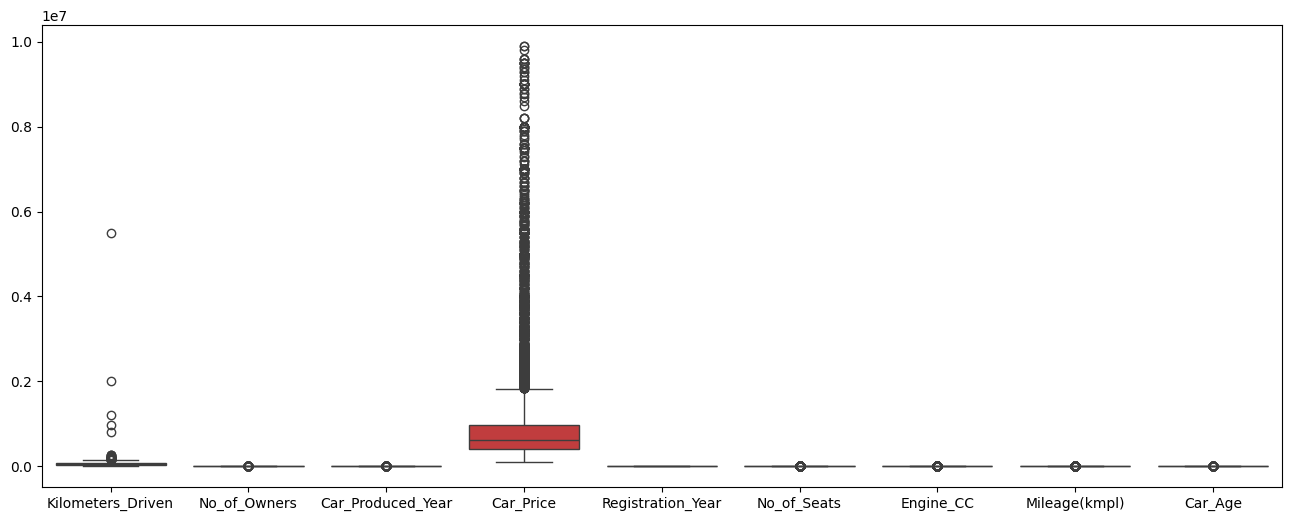

In [55]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

Kilometers_Driven


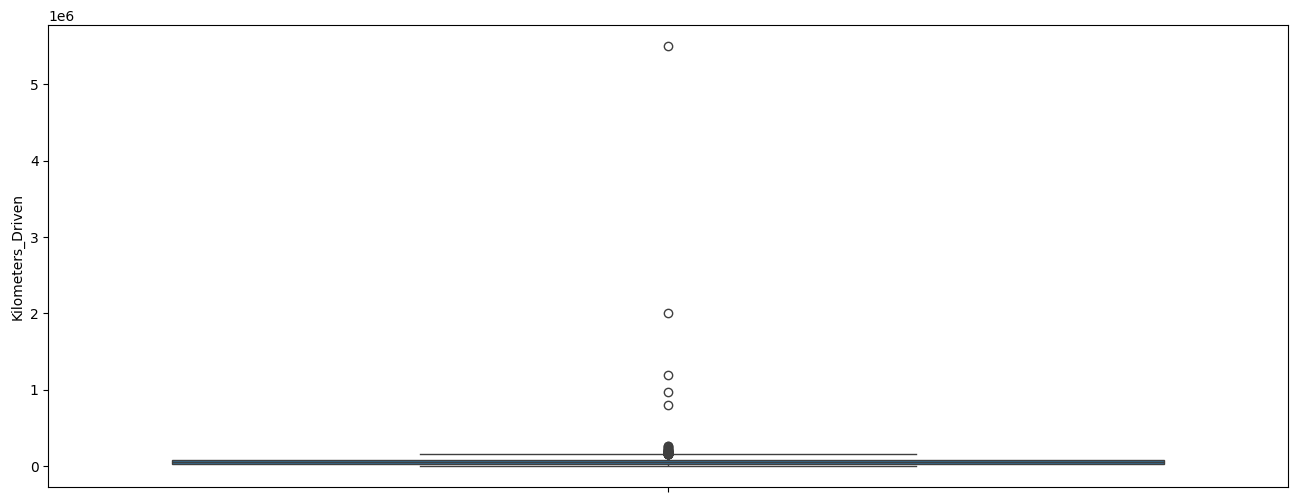

No_of_Owners


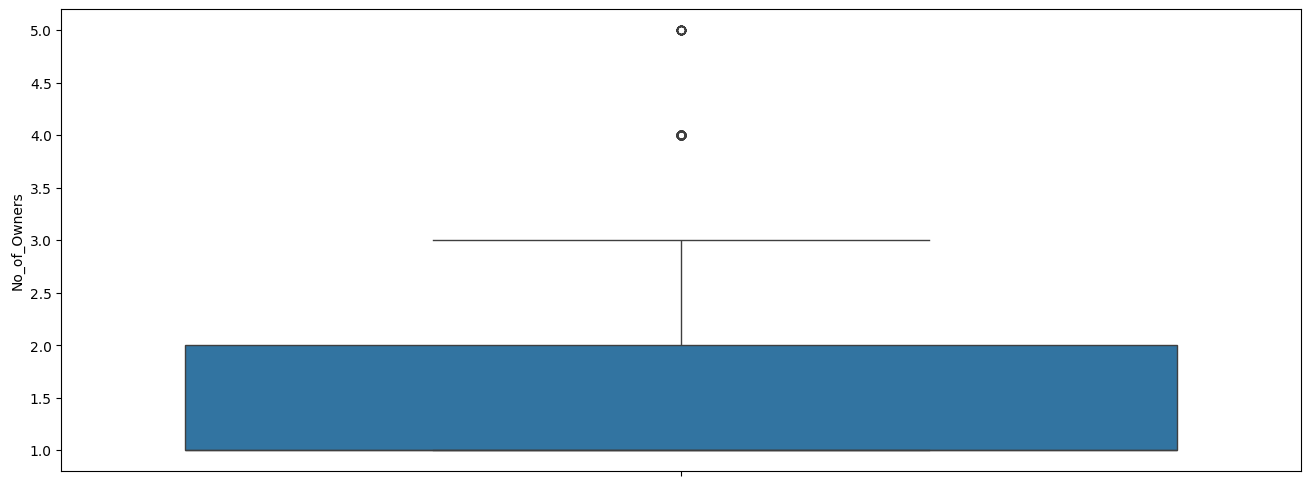

Car_Produced_Year


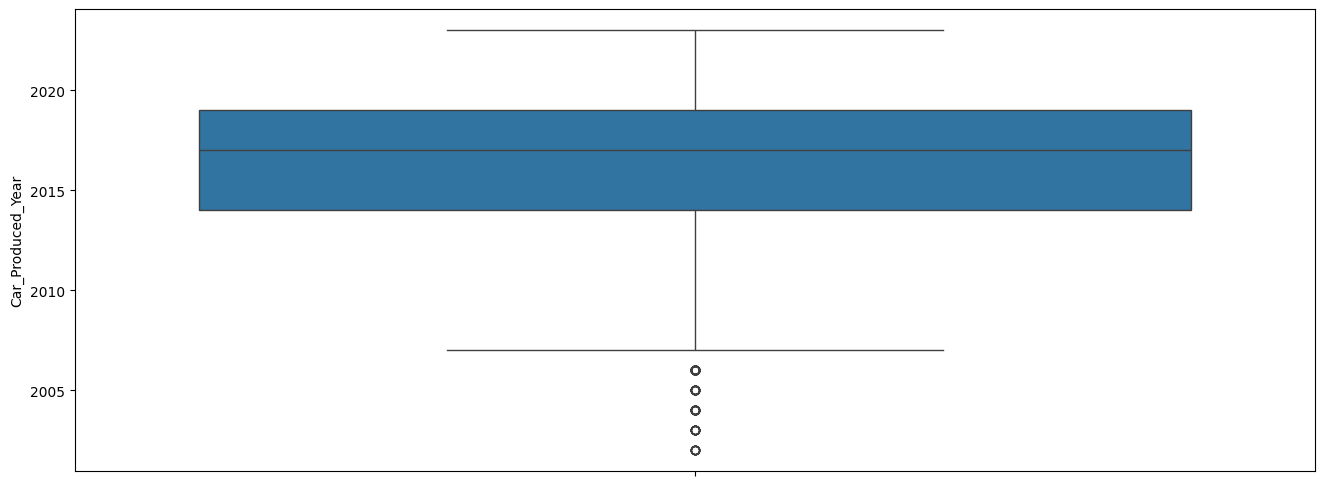

Car_Price


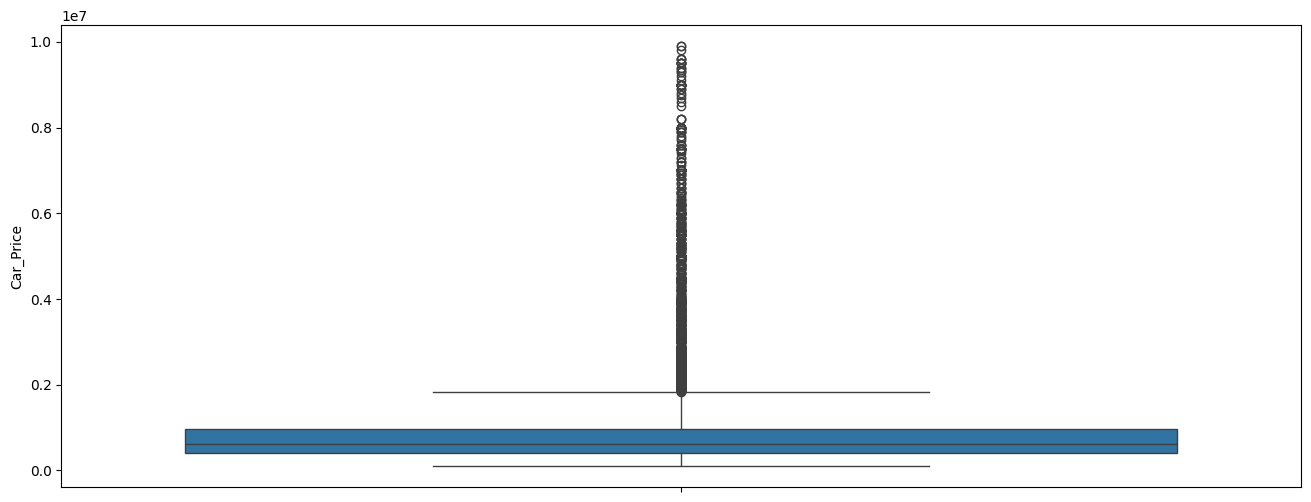

Registration_Year


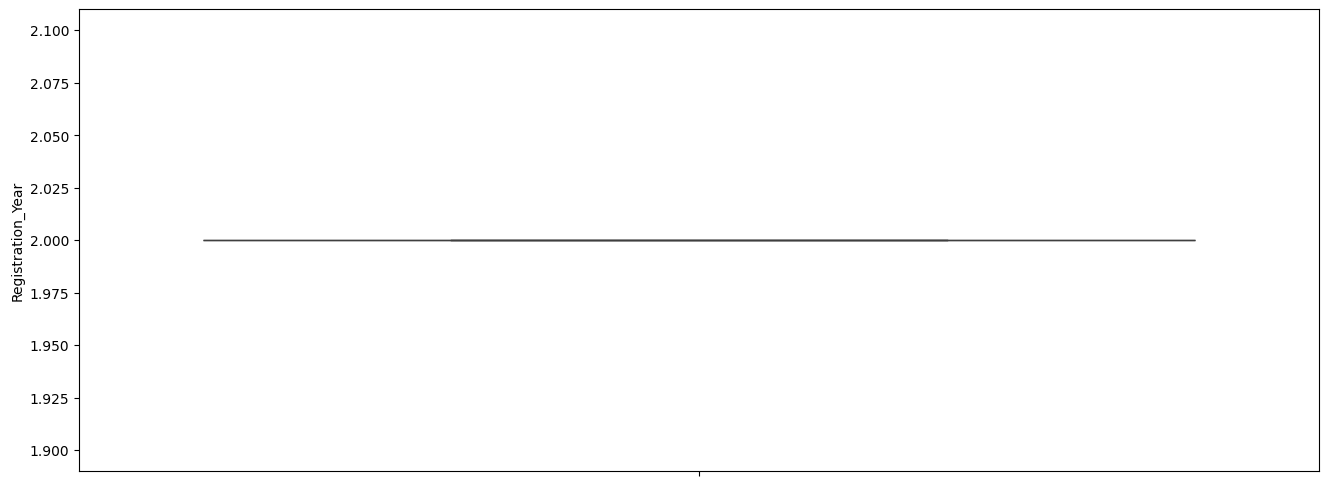

No_of_Seats


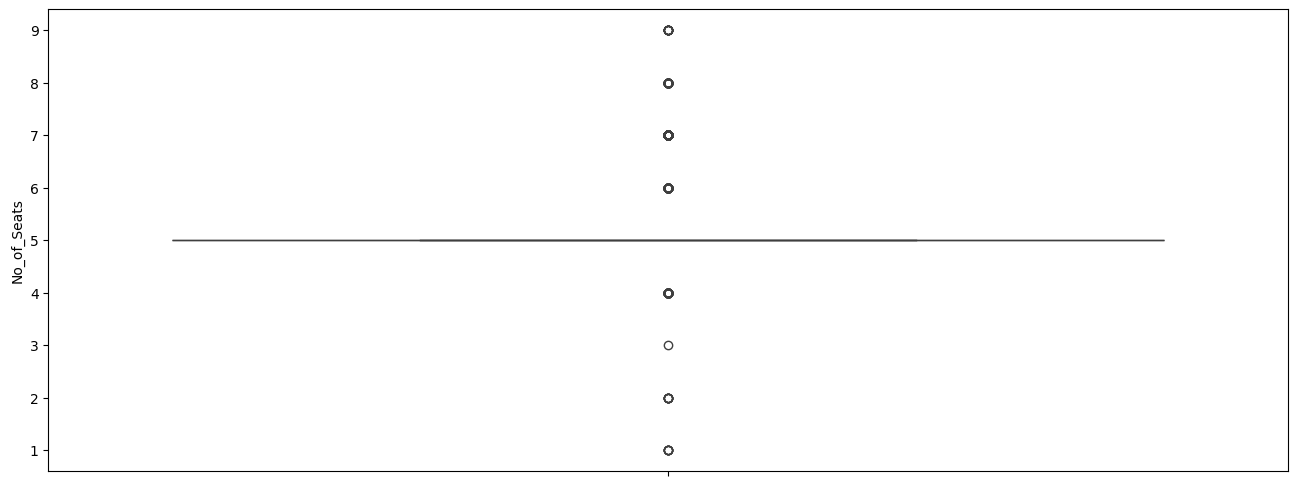

Engine_CC


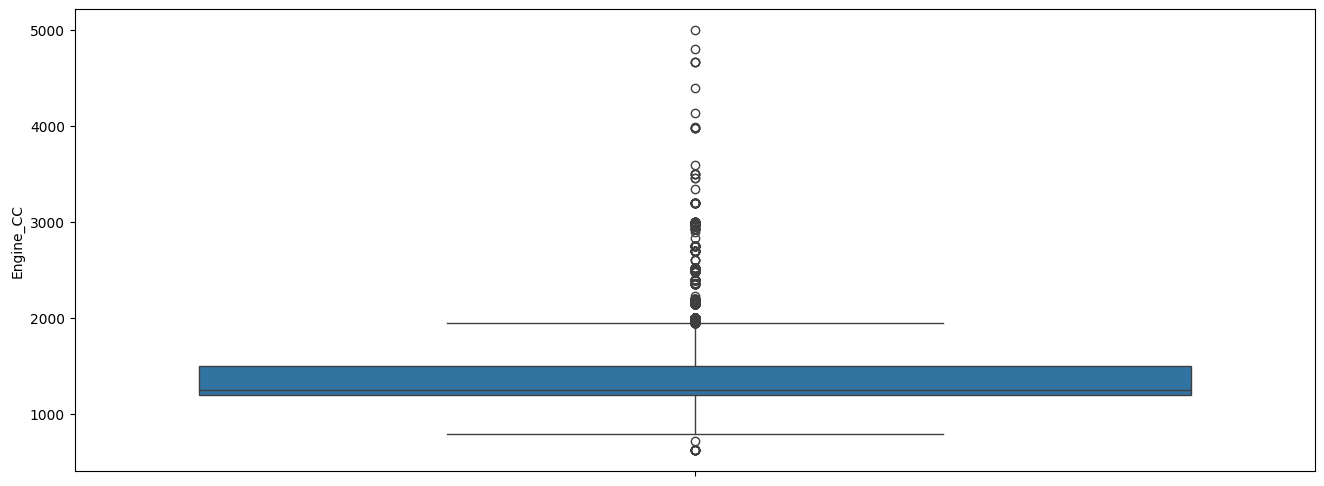

Mileage(kmpl)


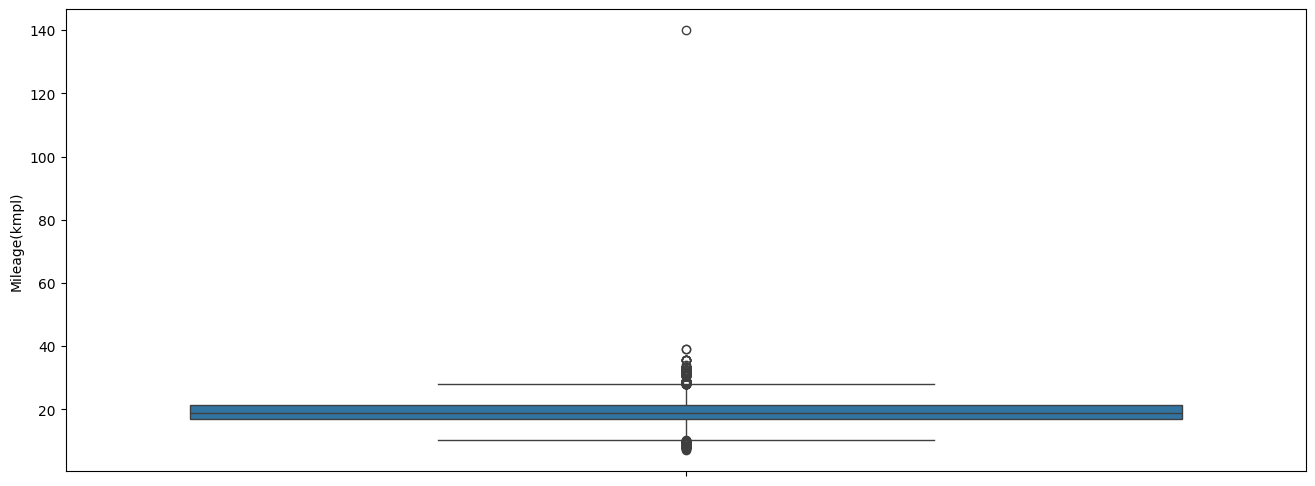

Car_Age


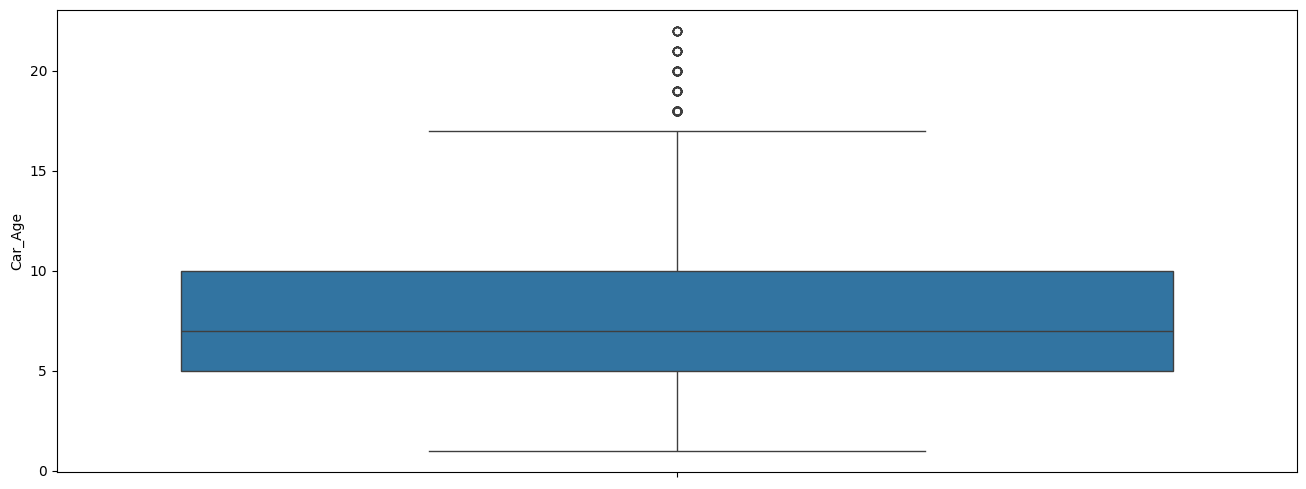

In [56]:
for i in data.columns:
    if data[i].dtype !="object":
       print(i)
       plt.figure(figsize=(16,6))
       sns.boxplot(data=data[i])
       plt.show()

In [57]:
price = data[(data['Car_Produced_Year']<2009)&(data['Car_Price']>1000000)&(data['Manufactured_By']!= 'BMW')]
data.drop(price.index, inplace = True)

C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\3070179363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(price.index, inplace = True)


In [58]:
data.to_csv("Filtered_Car_Dekho.csv", index=False)

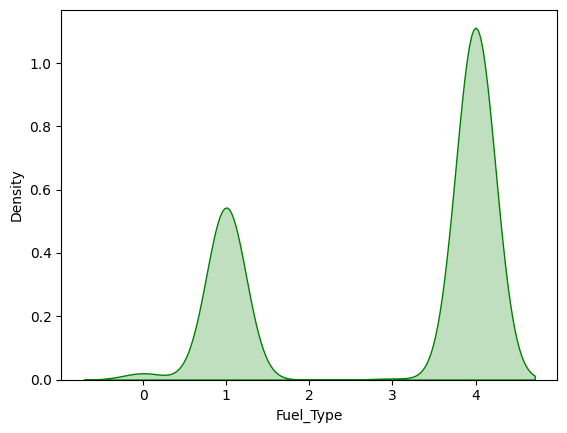

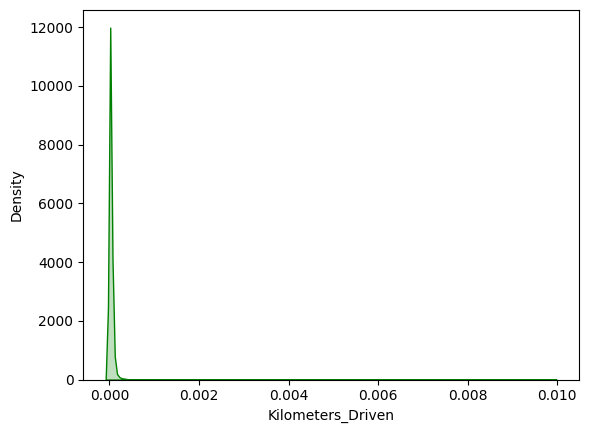

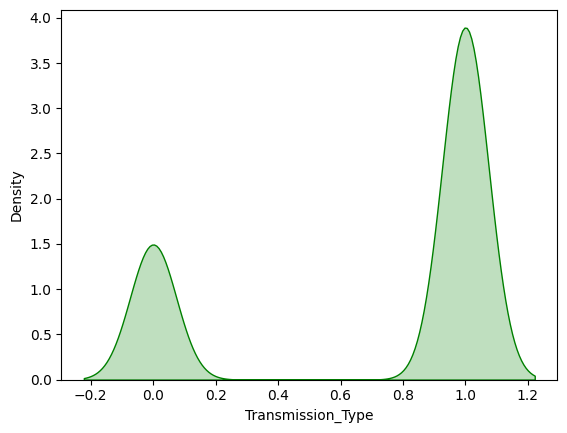

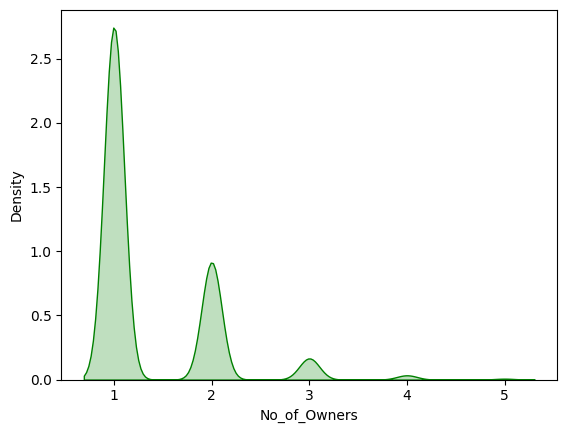

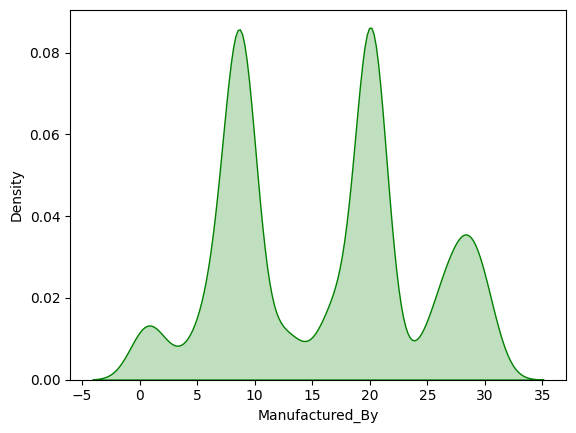

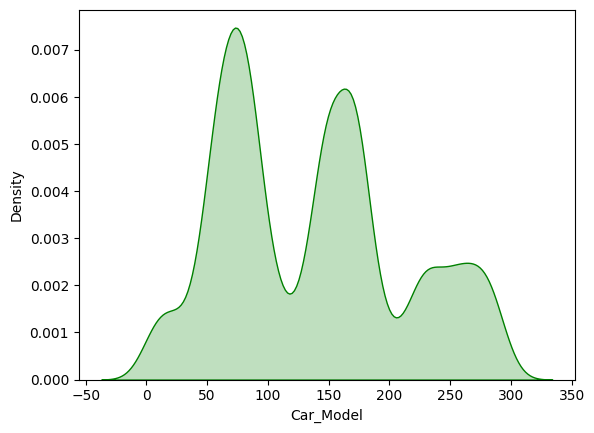

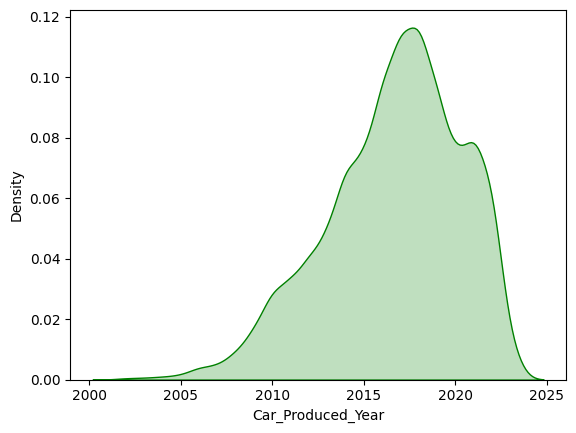

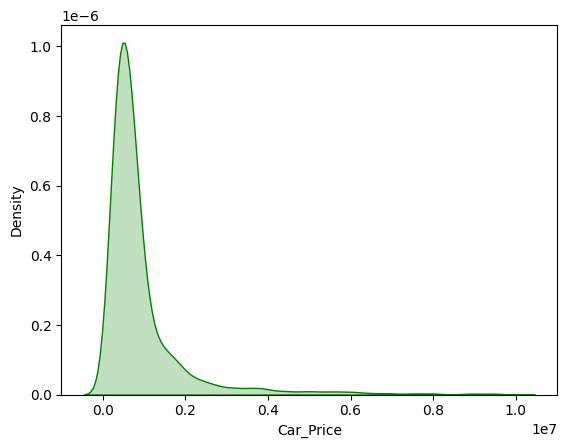

C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\2130203302.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[i],fill=True,color="g"), "warn_Singular=false"


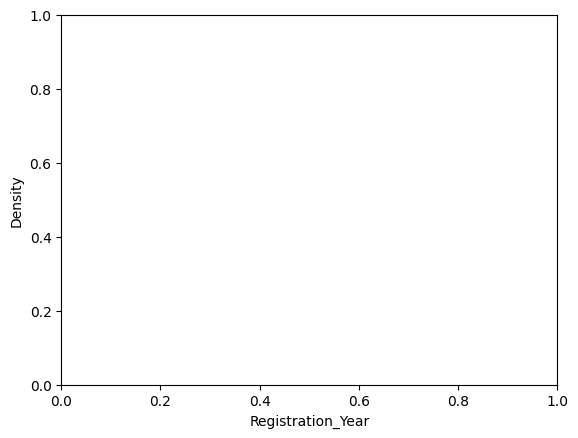

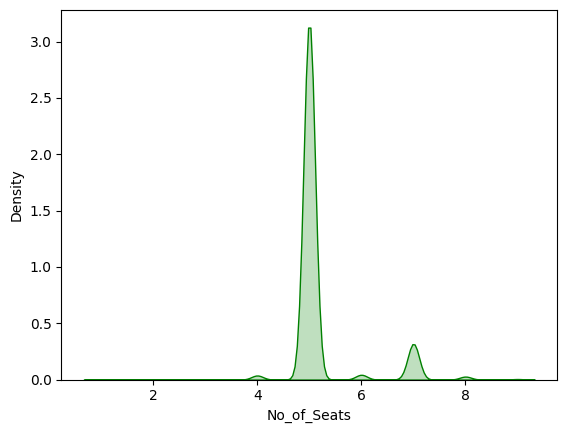

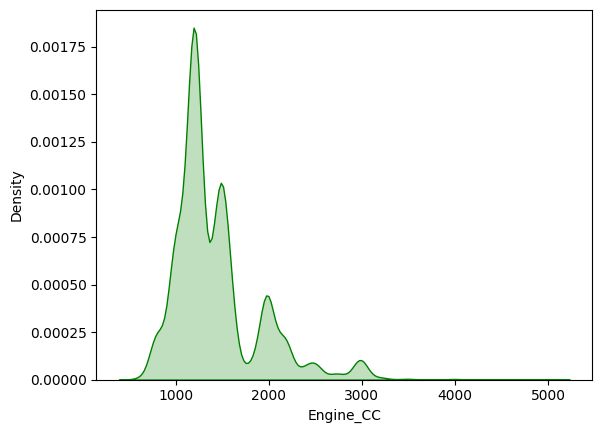

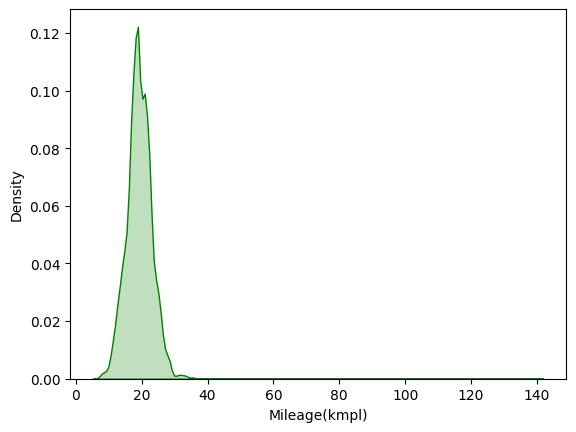

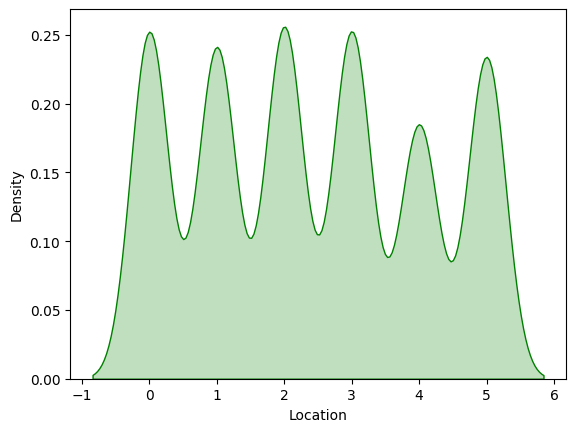

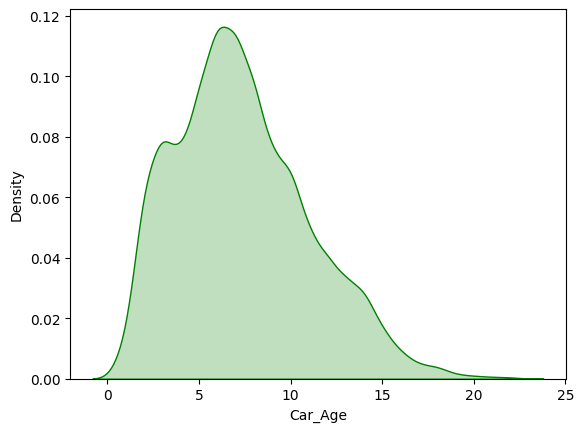

In [69]:
for i in data.columns:
    if data[i].dtype != 'object' :
        sns.kdeplot(data=data[i],fill=True,color="g"), "warn_Singular=false"
        plt.show()

In [60]:
def inv_trans(x):
    if x!=0:
        return 1/x
    else:
        return 0

# data = data_3.copy()
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(inv_trans)

C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\3447379293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(inv_trans)


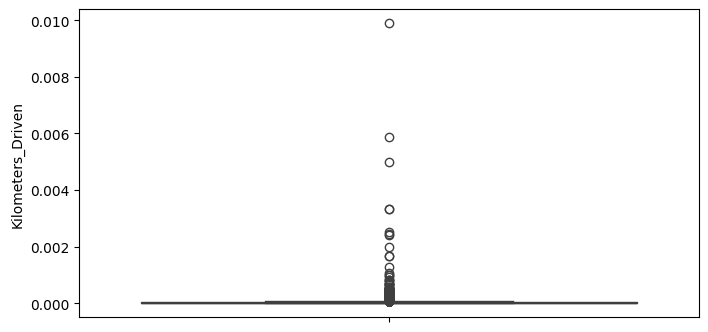

In [61]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data['Kilometers_Driven'])
plt.show()

In [62]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        col_name = i
        data[i] = enc.fit_transform(data[[i]])
        encode = data[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(data[[i]])
        decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
        globals()[i] = dict(zip(decoded, encode))

C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\3427784382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = enc.fit_transform(data[[i]])
C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\3427784382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = enc.fit_transform(data[[i]])
C:\Users\GALAXY\AppData\Local\Temp\ipykernel_19784\3427784382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [63]:
Location

{'Bangalore': np.float64(0.0),
 'Chennai': np.float64(1.0),
 'Delhi': np.float64(2.0),
 'Hyderabad': np.float64(3.0),
 'Jaipur': np.float64(4.0),
 'Kolkata': np.float64(5.0)}

In [64]:
data.to_csv('Preprocessed_Car_Dheko.csv', index = False)

In [65]:
df = pd.read_csv('Preprocessed_Car_Dheko.csv')

In [66]:
df

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
0,4.0,0.000014,0.0,3,29.0,262.0,2014,975000.0,2,5,2494,19.16,5.0,10
1,4.0,0.000042,1.0,1,4.0,38.0,2017,266000.0,2,5,799,22.70,5.0,7
2,4.0,0.000141,0.0,1,26.0,227.0,2021,595000.0,2,5,999,19.03,5.0,3
3,4.0,0.000014,1.0,2,9.0,87.0,2011,223000.0,2,5,1197,17.00,5.0,13
4,1.0,0.000020,0.0,2,0.0,7.0,2014,1200000.0,2,5,1968,15.73,5.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,1.0,0.000014,1.0,1,17.0,131.0,2016,840000.0,2,7,1997,15.40,2.0,8
8092,4.0,0.000017,0.0,1,8.0,61.0,2019,900000.0,2,5,1497,18.00,2.0,5
8093,4.0,0.000050,1.0,1,13.0,105.0,2021,950000.0,2,5,1197,18.40,2.0,3
8094,4.0,0.000017,1.0,1,9.0,83.0,2011,418000.0,2,5,1591,17.01,2.0,13


In [67]:
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','Car_Price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)','Car_Age']]
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','Location']]

<Axes: >

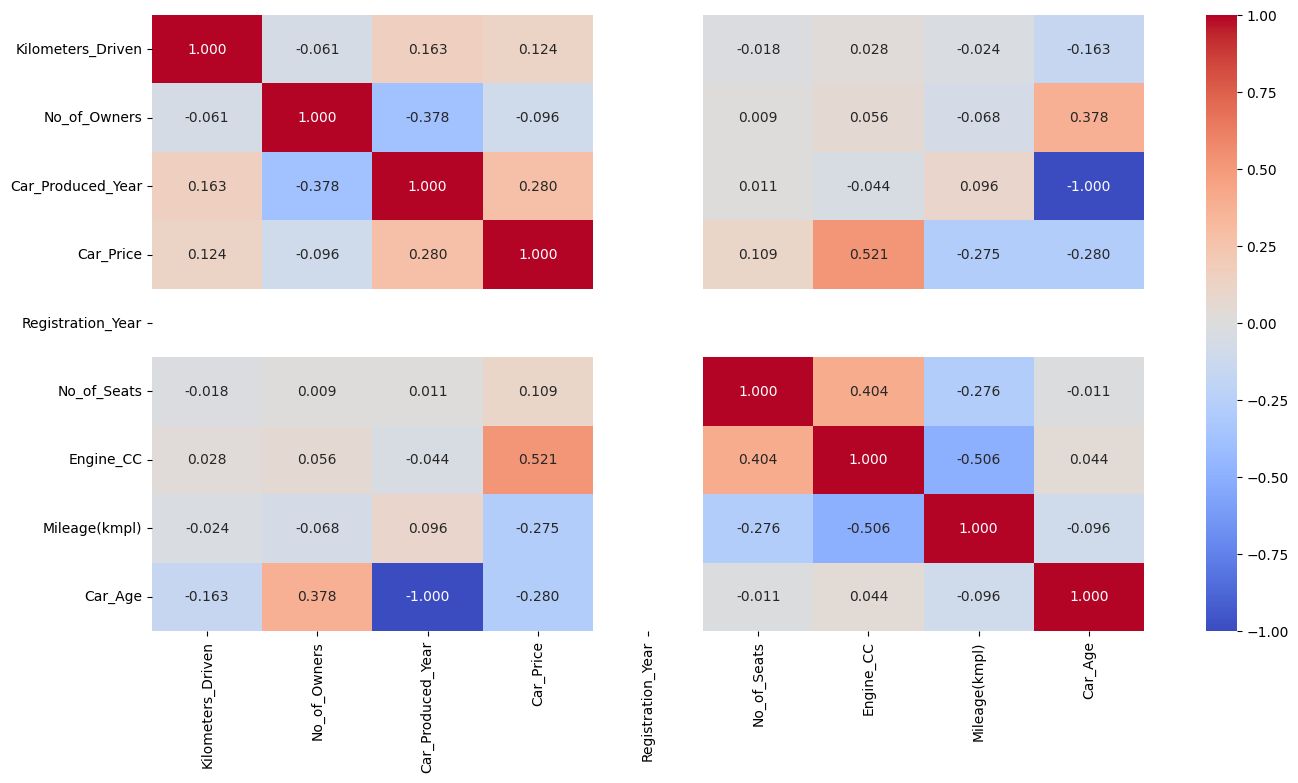

In [68]:
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".3f")

In [70]:
df.drop(df[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [71]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 2.1724119865942296e-23
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type Location 4.4941383714533904e-36
Transmission_Type Fuel_Type 2.1724119865942296e-23
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type Location 1.8067858320876115e-32
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By Location 2.771830804834228e-35
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model Location 6.181109648350496e-48
Location Fuel_Type 4.494138371453453e-36
Location Transmission_Type 1.8067858320875855e-32
Location Manufactured_By 2.7718308048341483e-35
Location Car_Model 6.181109648350496e-48
Location Location 0.0


In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
features = df.drop('Car_Price',axis = 1)
target = df['Car_Price']

In [74]:
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [75]:
model.feature_importances_

array([0.00659429, 0.06179099, 0.08978457, 0.01713709, 0.01721497,
       0.05383731, 0.18600111, 0.0178082 , 0.45488635, 0.06246942,
       0.0324757 ])

In [76]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)#.head(12).column.values
feature_importance

,column,Score
8,Engine_CC,45.488635
6,Car_Produced_Year,18.600111
2,Transmission_Type,8.978457
9,Mileage(kmpl),6.246942
1,Kilometers_Driven,6.179099
5,Car_Model,5.383731
10,Location,3.247570
7,No_of_Seats,1.780820
4,Manufactured_By,1.721497
3,No_of_Owners,1.713709


In [77]:
x = df.drop(['Car_Price','Manufactured_By','No_of_Seats','Fuel_Type','No_of_Owners'],axis = 1)
y = df['Car_Price']
print(x.shape)
x

(8096, 7)


,Kilometers_Driven,Transmission_Type,Car_Model,Car_Produced_Year,Engine_CC,Mileage(kmpl),Location
0,0.000014,0.0,262.0,2014,2494,19.16,5.0
1,0.000042,1.0,38.0,2017,799,22.70,5.0
2,0.000141,0.0,227.0,2021,999,19.03,5.0
3,0.000014,1.0,87.0,2011,1197,17.00,5.0
4,0.000020,0.0,7.0,2014,1968,15.73,5.0
...,...,...,...,...,...,...,...
8091,0.000014,1.0,131.0,2016,1997,15.40,2.0
8092,0.000017,0.0,61.0,2019,1497,18.00,2.0
8093,0.000050,1.0,105.0,2021,1197,18.40,2.0
8094,0.000017,1.0,83.0,2011,1591,17.01,2.0


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [79]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6476, 7), (1620, 7), (6476,), (1620,))

In [80]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

181027.01656057895
234758.97802471876
0.7821084145883794
0.6685496076107715


In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
model_kn = KNeighborsRegressor(n_neighbors = 4)
model_kn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [84]:
y_pred_test = model_kn.predict(x_test)
y_pred_train = model_kn.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

149440.70413835702
205983.95061728396
0.8196401849513923
0.6821243115419785


In [85]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error',n_estimators=700 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=700, random_state=50)

In [86]:
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

154088.63469012073
198260.1332663597
0.8199637915854118
0.729550434631041


In [87]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=7,
                          n_estimators=400)

In [88]:
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

77010.75278706964
186525.8346919193
0.9672998407558522
0.7676623370796632


In [89]:
import pickle

with open('GradientBoost_model.pkl', 'wb') as file:
    pickle.dump(model_GB,file)

In [90]:
import pickle

with open('RandomForest_model.pkl', 'wb') as file:
    pickle.dump(model_RF,file)